# Hilo GeoJson Exploration for Yelp API Scrape

In [88]:
#opening libraries
import pandas as pd
import json
import geopandas as gpd


with open('../data/boundaries/hilo.geojson') as f:
    hilo = json.load(f)


fname = '../data/boundaries/hilo.geojson'
hilo_gpd = gpd.read_file(fname)

### Using Shapely LineString

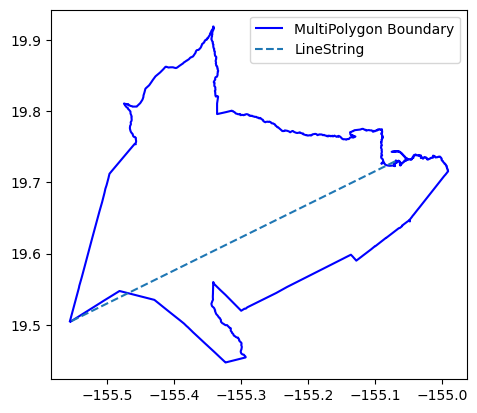

In [104]:
from shapely.geometry import LineString, MultiPolygon
import matplotlib.pyplot as plt
import geopandas as gpd


#### example 


#took random points from file
line_coordinates = [(-155.552627, 19.505175), (-155.0687025, 19.730062)]

#made a line
line = LineString(line_coordinates)

#plot line and shape
fig, ax = plt.subplots()

hilo_gpd['geometry'].boundary.plot(ax=ax, color='blue', label='MultiPolygon Boundary')

x, y = line.xy
ax.plot(x, y, label='LineString', linestyle='dashed')

plt.legend()
plt.show()



We could iterate through x,y points and every n amount of steps we could draw a line so that we get a grid, then we could get each of the intersections of the lines and save them for Yelp.

### Using Shapely Linear Ring

https://shapely.readthedocs.io/en/stable/reference/shapely.LinearRing.html

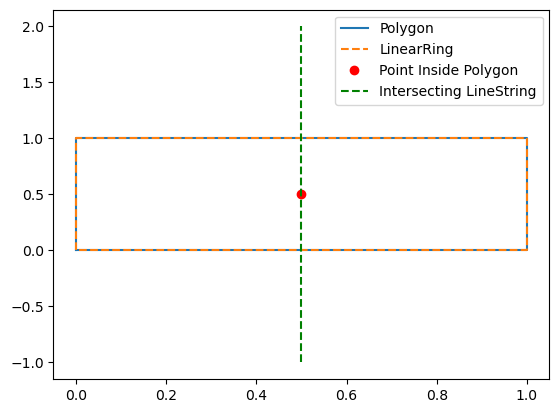

In [107]:
from shapely.geometry import Polygon, LinearRing, LineString
import matplotlib.pyplot as plt

# Example LinearRing coordinates, 4 coordinates makes a box , the more coordinates the closer to circle

linear_ring_coords = [(0, 0), (0, 1), (1, 1), (1, 0), (0, 0)]

# Create a LinearRing
linear_ring = LinearRing(linear_ring_coords)

# Create a Polygon using the LinearRing
polygon = Polygon(linear_ring)

# Plot the Polygon and LinearRing
fig, ax = plt.subplots()

x, y = polygon.exterior.xy
ax.plot(x, y, label='Polygon')

x, y = linear_ring.xy
ax.plot(x, y, label='LinearRing', linestyle='dashed')

# Check if a point is inside the Polygon
point_to_check = Point(0.5, 0.5)
if polygon.contains(point_to_check):
    x, y = point_to_check.xy
    ax.plot(x, y, 'o', label='Point Inside Polygon', color='red')

# Check if a LineString intersects with the Polygon
line_to_check = LineString([(0.5, -1), (0.5, 2)])
if polygon.intersects(line_to_check):
    x, y = line_to_check.xy
    ax.plot(x, y, label='Intersecting LineString', linestyle='dashed', color='green')

plt.legend()
plt.show()


### Shapely Box

https://shapely.readthedocs.io/en/stable/reference/shapely.box.html

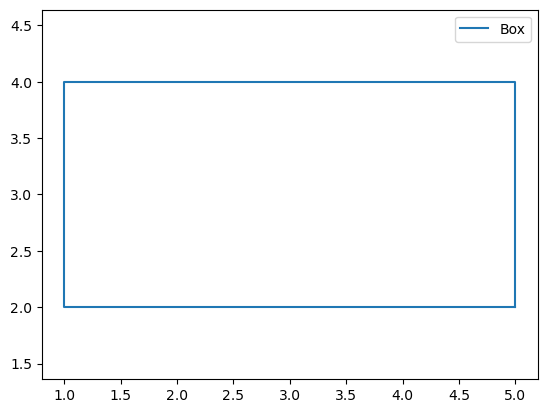

In [108]:
from shapely.geometry import box
import matplotlib.pyplot as plt

# Example: Create a box with coordinates (minx, miny, maxx, maxy)
minx, miny, maxx, maxy = (1, 2, 5, 4)
rectangle = box(minx, miny, maxx, maxy)

# Plot the box
fig, ax = plt.subplots()
x, y = rectangle.exterior.xy
ax.plot(x, y, label='Box')

plt.legend()
plt.axis('equal')
plt.show()


## more with shapely linear ring

In [111]:
for coordinate in hilo['coordinates']:
    print(coordinate)

[[[-155.555413, 19.503474], [-155.552627, 19.505175], [-155.551775, 19.505635], [-155.551101, 19.506111], [-155.548408, 19.507725], [-155.546935, 19.50861], [-155.5449896, 19.5097477], [-155.542655, 19.511113], [-155.5422493, 19.5113533], [-155.5398151, 19.512795], [-155.5394093, 19.5130354], [-155.5380146, 19.5138614], [-155.5377865, 19.5139965], [-155.5353523, 19.5154382], [-155.5345408, 19.5159188], [-155.531295, 19.517841], [-155.5308892, 19.5180814], [-155.5288608, 19.519283], [-155.5284551, 19.5195233], [-155.5280494, 19.5197636], [-155.5276436, 19.520004], [-155.5260045, 19.520975], [-155.5256151, 19.5212056], [-155.5239924, 19.5221668], [-155.5227751, 19.5228878], [-155.519935, 19.52457], [-155.5195147, 19.524819], [-155.5191235, 19.5250507], [-155.515878, 19.5269733], [-155.5154719, 19.5272138], [-155.5142551, 19.5279346], [-155.5135074, 19.5283775], [-155.5097922, 19.530578], [-155.508575, 19.531299], [-155.5081873, 19.5315349], [-155.5050861, 19.5334217], [-155.5043213, 19.5

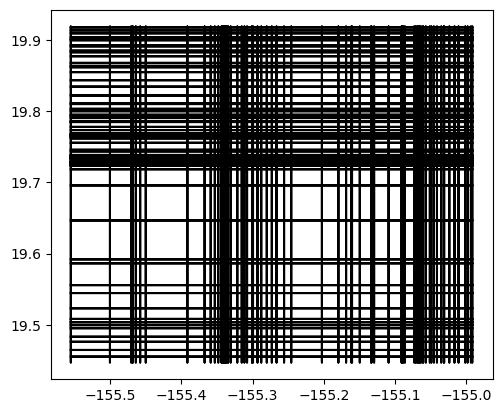

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import LineString

##trial one just making grids and saving file


def plot_grid_with_steps_and_save(geojson_file, step, save_file=None):
    with open(geojson_file, 'r') as file:
        geojson_data = json.load(file)

    line_strings = []

    for polygon_coordinates in geojson_data['coordinates']:
        # Assuming the first set of coordinates is for the exterior ring
        exterior_coords = np.array(polygon_coordinates[0])

        # Plot vertical lines with steps
        x_coordinates = exterior_coords[:, 0]
        for i in range(0, len(x_coordinates), step):
            line = LineString([(x_coordinates[i], y) for y in exterior_coords[:, 1]])
            line_strings.append(line)

        # Plot horizontal lines with steps
        y_coordinates = exterior_coords[:, 1]
        for i in range(0, len(y_coordinates), step):
            line = LineString([(x, y_coordinates[i]) for x in exterior_coords[:, 0]])
            line_strings.append(line)

    if save_file:
        # Save LineString geometries to a GeoJSON file
        features = [{"type": "Feature", "geometry": ls.__geo_interface__} for ls in line_strings]
        output_geojson = {"type": "FeatureCollection", "features": features}
        with open(save_file, 'w') as output_file:
            json.dump(output_geojson, output_file)

    # Plotting (unchanged)
    fig, ax = plt.subplots()
    for line in line_strings:
        ax.plot(*line.xy, color='black')

    ax.set_aspect('equal')
    plt.show()


# Set 'step' to the desired interval between lines
plot_grid_with_steps_and_save('../data/boundaries/hilo.geojson', step=50)


In [2]:
import json
import numpy as np
from shapely.geometry import LineString, MultiLineString, Point



#finds intersection of above grid and saves them

def find_intersections(geojson_file, step):
    with open(geojson_file, 'r') as file:
        geojson_data = json.load(file)

    line_strings = []

    for polygon_coordinates in geojson_data['coordinates']:
        # Assuming the first set of coordinates is for the exterior ring
        exterior_coords = np.array(polygon_coordinates[0])

        # Create LineString geometries for vertical lines
        x_coordinates = exterior_coords[:, 0]
        for i in range(0, len(x_coordinates), step):
            line = LineString([(x_coordinates[i], y) for y in exterior_coords[:, 1]])
            line_strings.append(line)

        # Create LineString geometries for horizontal lines
        y_coordinates = exterior_coords[:, 1]
        for i in range(0, len(y_coordinates), step):
            line = LineString([(x, y_coordinates[i]) for x in exterior_coords[:, 0]])
            line_strings.append(line)

    # Create a MultiLineString from the LineString geometries
    multi_line = MultiLineString(line_strings)

    # Find intersections
    intersections = multi_line.intersection(multi_line)

    # Extract intersection coordinates
    intersection_coords = []
    for line in multi_line.geoms:
        if isinstance(line, LineString):
            for point in line.coords:
                intersection_coords.append((point[0], point[1]))

    return intersection_coords

# Replace 'your_geojson_file.geojson' with the actual file path
# Set 'step' to the desired interval between lines
intersection_coordinates = find_intersections('../data/boundaries/hilo.geojson', step=50)


## trying to make a grid on hilo

In [81]:
# import geopandas as gpd

# # Load GeoJSON file into GeoDataFrame
# geojson_file = "../data/boundaries/hilo.geojson"
# hilo_gdf = gpd.read_file(geojson_file)

# # Get the total bounding box of all features in the GeoDataFrame
# total_bbox = hilo_gdf.total_bounds

# # Print the bounding box coordinates
# min_lon, min_lat, max_lon, max_lat = total_bbox
# print(f"Bounding Box: (min_lon={min_lon}, min_lat={min_lat}, max_lon={max_lon}, max_lat={max_lat})")


import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Load GeoJSON file into GeoDataFrame
geojson_file = "../data/boundaries/hilo.geojson"
hilo_gdf = gpd.read_file(geojson_file)

# Get the total bounding box of all features in the GeoDataFrame
geojson_bbox = hilo_gdf.total_bounds

# Adjust the total bounding box
total_bbox = (max(min_lon, geojson_bbox[0]), max(min_lat, geojson_bbox[1]),
              min(max_lon, geojson_bbox[2]), min(max_lat, geojson_bbox[3]))

# Print the adjusted bounding box coordinates
min_lon, min_lat, max_lon, max_lat = total_bbox
print(f"Bounding Box: (min_lon={min_lon}, min_lat={min_lat}, max_lon={max_lon}, max_lat={max_lat})")




Bounding Box: (min_lon=-155.555413, min_lat=19.447004, max_lon=-154.990994, max_lat=19.918815)


In [82]:
def generate_quadrants(min_lon, min_lat, max_lon, max_lat, n):
    midpoints = []
    quadrants = []

    for i in range(n):
        quad_min_lon = min_lon + (i % 2) * (max_lon - min_lon) / 2
        quad_max_lon = min_lon + (i % 2 + 1) * (max_lon - min_lon) / 2
        quad_min_lat = min_lat + (i // 2) * (max_lat - min_lat) / 2
        quad_max_lat = min_lat + (i // 2 + 1) * (max_lat - min_lat) / 2

        midpoint_lon = (quad_min_lon + quad_max_lon) / 2
        midpoint_lat = (quad_min_lat + quad_max_lat) / 2
        midpoints.append((midpoint_lon, midpoint_lat))

        quadrant = (quad_min_lon, quad_max_lon, quad_min_lat, quad_max_lat)
        quadrants.append(quadrant)

    return midpoints, quadrants

# Assuming total_bbox is defined somewhere
total_bbox = (min_lon, min_lat, max_lon, max_lat)

# Generate midpoints and quadrants
midpoints, quadrants = generate_quadrants(*total_bbox, 15)

# Plot the corrected quadrants



In [83]:
from shapely.geometry import Point

def calculate_quadrant_center(quadrant):
    min_lon, max_lon, min_lat, max_lat = quadrant
    center_lon = (min_lon + max_lon) / 2
    center_lat = (min_lat + max_lat) / 2
    return Point(center_lon, center_lat)

def calculate_center_points(quadrants):
    center_points = []
    for quadrant in quadrants:
        center_point = calculate_quadrant_center(quadrant)
        center_points.append(center_point)
    return center_points


# Generate quadrants using the previous function
midpoints, quadrants = generate_quadrants(*total_bbox, 15)

# Calculate center points in all six quadrants
center_points = calculate_center_points(quadrants)


coordinates_list = [(point.x, point.y) for point in center_points]

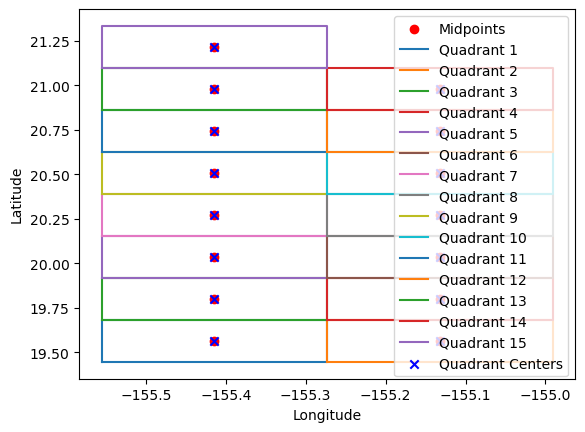

In [85]:
import matplotlib.pyplot as plt
from shapely.geometry import Point

def plot_quadrants_and_centers(midpoints, quadrants, center_points):
    # Extract coordinates for plotting
    lons, lats = zip(*midpoints)
    center_lons, center_lats = zip(*[(point.x, point.y) for point in center_points])
    
    # Plot midpoints
    plt.scatter(lons, lats, c='red', marker='o', label='Midpoints')

    # Plot quadrants
    for i, quadrant in enumerate(quadrants):
        quad_min_lon, quad_max_lon, quad_min_lat, quad_max_lat = quadrant
        quad_lons = [quad_min_lon, quad_max_lon, quad_max_lon, quad_min_lon, quad_min_lon]
        quad_lats = [quad_min_lat, quad_min_lat, quad_max_lat, quad_max_lat, quad_min_lat]
        plt.plot(quad_lons, quad_lats, label=f'Quadrant {i + 1}')

    # Plot center points
    plt.scatter(center_lons, center_lats, c='blue', marker='x', label='Quadrant Centers')

    # Set labels and legend
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    
    # Show the plot
    plt.show()

# Assuming total_bbox is defined somewhere
total_bbox = (min_lon, min_lat, max_lon, max_lat)

# Generate midpoints and quadrants
midpoints, quadrants = generate_quadrants(*total_bbox, 15)

# Calculate center points in all quadrants
center_points = calculate_center_points(quadrants)

# Plot the corrected quadrants and centers
plot_quadrants_and_centers(midpoints, quadrants, center_points)


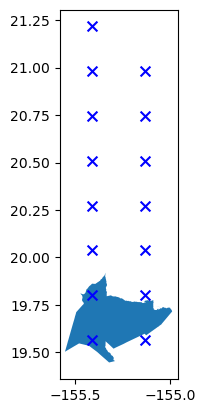

In [86]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Assuming total_bbox is defined somewhere
total_bbox = (min_lon, min_lat, max_lon, max_lat)

# Generate midpoints and quadrants
midpoints, quadrants = generate_quadrants(*total_bbox, 15)

# Calculate center points in all quadrants
center_points = calculate_center_points(quadrants)

# Create a GeoDataFrame for the center points
gdf_center_points = gpd.GeoDataFrame(geometry=center_points)

# Load the base GeoJSON file (replace 'your_geojson_file.geojson' with the actual file path)
base_map = gpd.read_file('../data/boundaries/hilo.geojson')

# Plot the base map
base_map.plot()

# Plot the center points on top of the base map
gdf_center_points.plot(ax=plt.gca(), marker='x', color='blue', markersize=50)

# Show the plot
plt.show()
